### Data analysis

This notebook contains created dataset analysis. The following issues are investigated:

1. How did the variables changed in time?
2. What does the price of bitcoin in function of time (date) look like compared to other variables after normalizing the data? (normalized data take values in the range of $ <-1, 1> $)
3. How are the variables correlated to each other? (correlation matrix and graphical summary of the relationships between the variables)
4. What is the variance inflation factor?
5. What is relationship between the price of bitcoin and other variables? (scatter plots)
6. Do transformations of some variables lead to more linear relationships? 

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
data=pd.read_csv('data_cleaning\Bitcoin_dataset_updated.csv',index_col='Date')
data.index=pd.to_datetime(data.index,format='%Y-%m-%d')

In [3]:
data.head()

,BTC price [USD],n-transactions,fee [USD],btc search trends,Gold price[USD],SP500 close index,Oil WTI price[USD],M2(Not seasonally adjusted)[1e+09 USD]
Date,,,,,,,,
2014-01-02,749.27,54770.0,0.18,8,1225.0,1831.98,95.14,11089.3
2014-01-03,781.23,60980.0,NaN,8,1238.4,1831.37,93.66,11089.3
2014-01-04,807.39,52052.0,NaN,8,NaN,NaN,NaN,11089.3
2014-01-05,828.74,58662.0,0.38,8,NaN,NaN,NaN,11089.3
2014-01-06,904.98,67358.0,NaN,8,1237.8,1826.77,93.12,11089.3


In [4]:
data.isnull().sum()

BTC price [USD]                             0
n-transactions                              0
fee [USD]                                 844
btc search trends                           0
Gold price[USD]                           642
SP500 close index                         721
Oil WTI price[USD]                        726
M2(Not seasonally adjusted)[1e+09 USD]      0
dtype: int64

Gold, SP500 and oil contain lots of NaN because markets do not operate on weekends. Values from Fridays will be assigned to these NaN.

Fee NaN values results from the website capabiliteis and it only concerns the period before the last three years. These values are filled using the forward fill method. It is acceptable because at the beginning of the bitcoin era the fees were rather constant.

In [5]:
data.fillna(method='ffill',inplace=True)

In [6]:
data.isnull().sum()

BTC price [USD]                           0
n-transactions                            0
fee [USD]                                 0
btc search trends                         0
Gold price[USD]                           0
SP500 close index                         0
Oil WTI price[USD]                        0
M2(Not seasonally adjusted)[1e+09 USD]    0
dtype: int64

__1. Charts showing changes of variables in function of time__

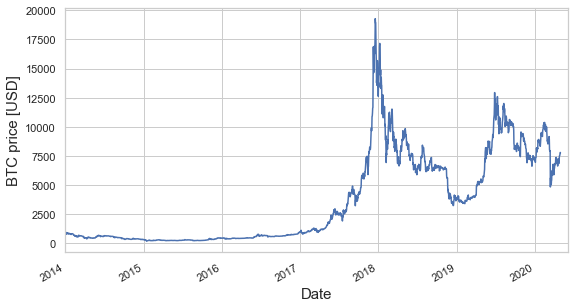

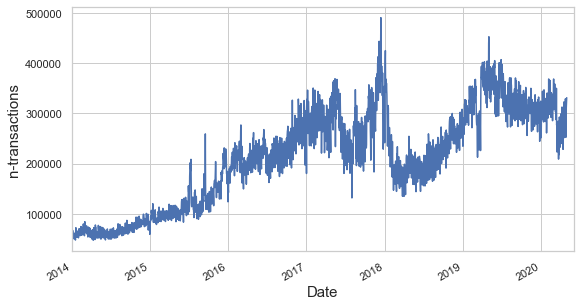

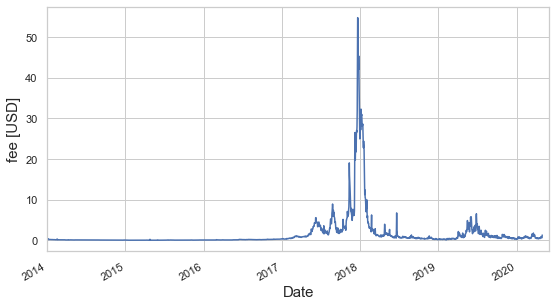

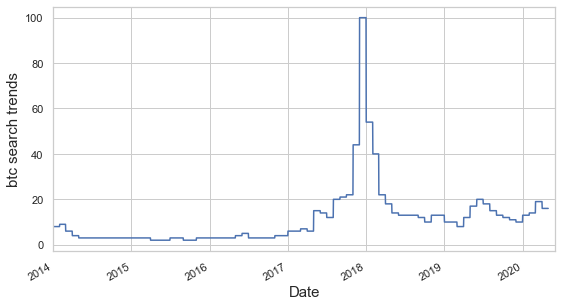

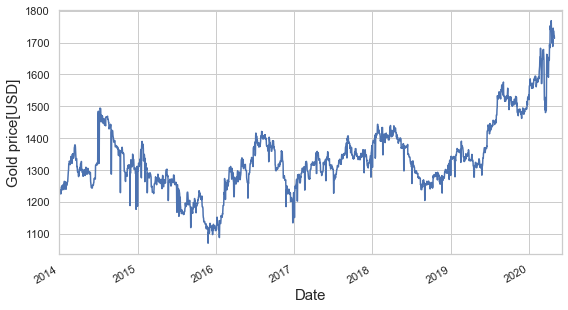

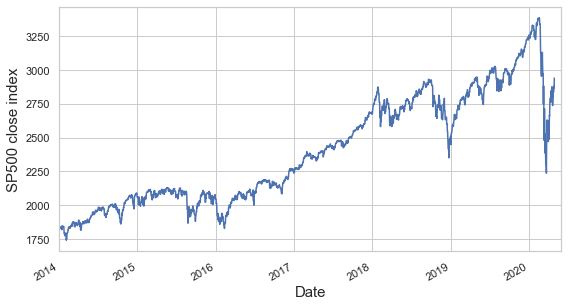

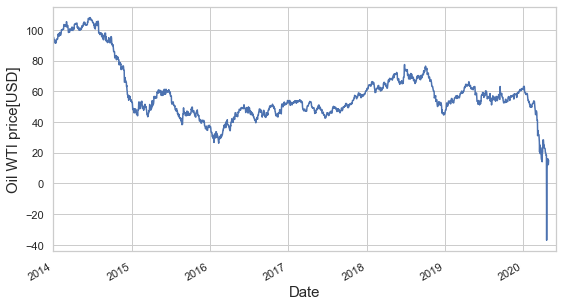

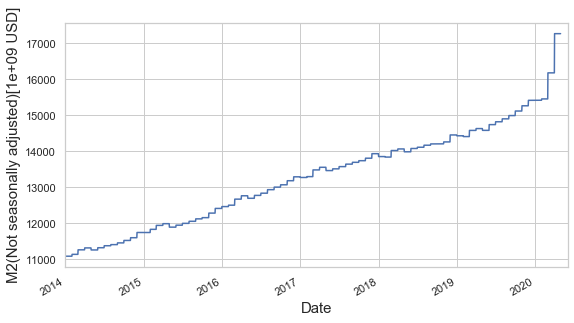

In [7]:
datemin = datetime.date(data.index.min().year, data.index.min().day-1, 1)
datemax = datetime.date(data.index.max().year, data.index.max().month + 2, 1)
sns.set(style="whitegrid", color_codes=True)

for i in data.columns:

    fig,ax = plt.subplots(figsize=(9,5))      
    data[i].plot(kind='line',ax=ax)
    plt.gcf().autofmt_xdate()
    ax.set_xlabel('Date',fontsize=15)
    ax.set_ylabel(str(i),fontsize=15)
    ax.set_xlim([datemin,datemax])
    plt.show()

__2. Charts showing a comparison of the price of bitcoin with other variables in function of time after normalization__

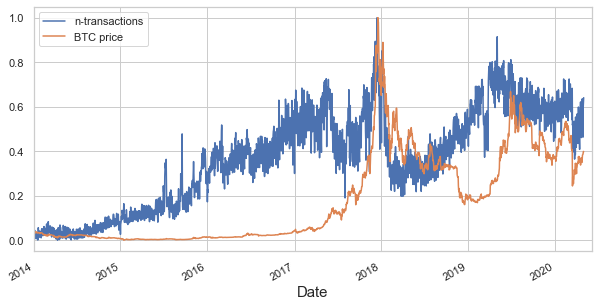

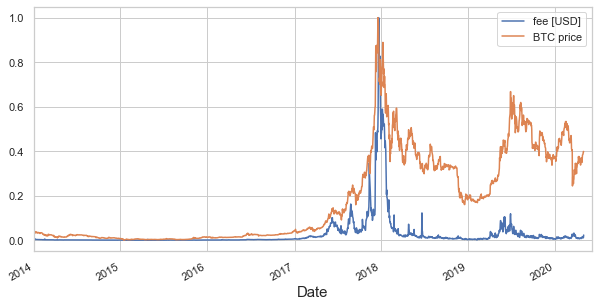

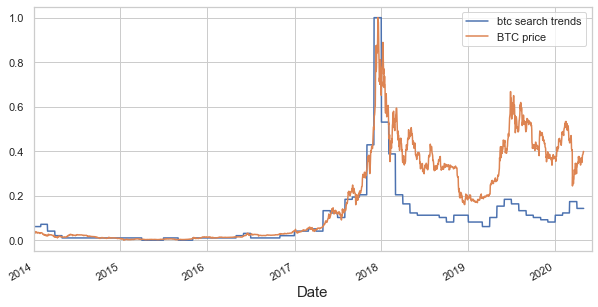

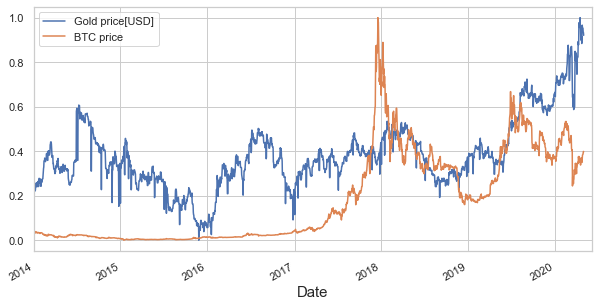

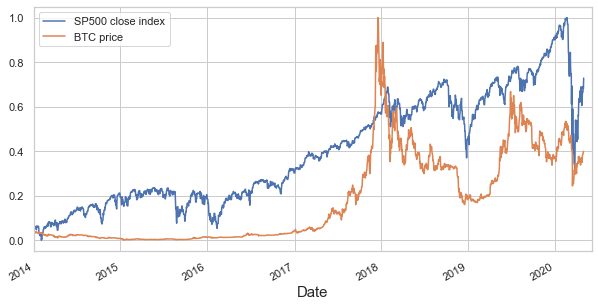

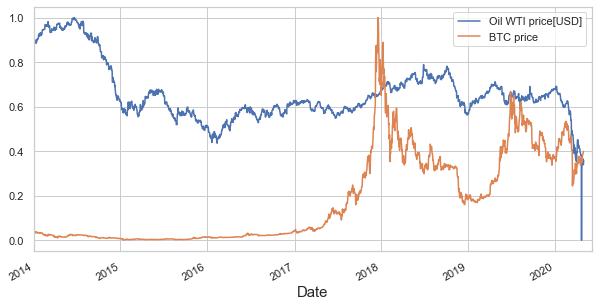

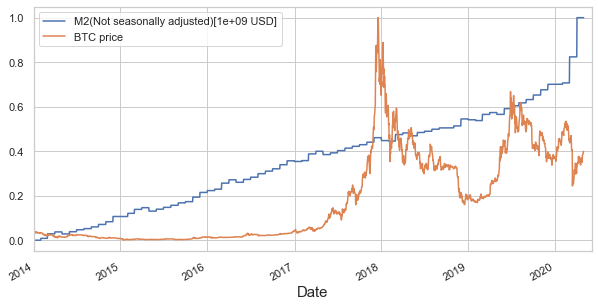

In [8]:
data2=data.copy()
mms=MinMaxScaler()
for i in data2.columns:
    data2[i]=mms.fit_transform(data[[i]])
    
for i in data2.iloc[:,1:].columns:
    fig,ax=plt.subplots(figsize=(10,5))
    data2[i].plot(ax=ax,label=i)
    data2.iloc[:,0].plot(ax=ax,label='BTC price')
    plt.gcf().autofmt_xdate()
    ax.set_xlabel('Date',fontsize=15)
    ax.set_xlim([datemin,datemax])
    ax.legend()
    plt.show()

__3. Correlation of variables__ 

Correlation matrix

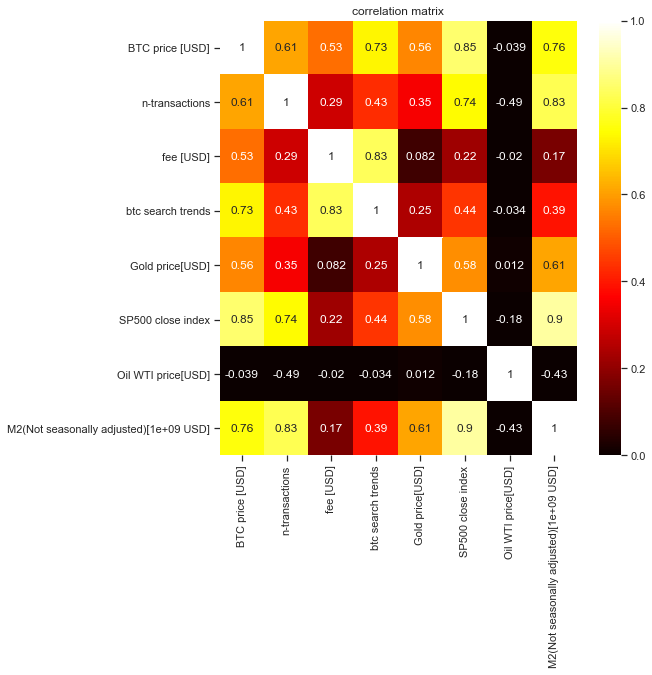

,BTC price [USD],n-transactions,fee [USD],btc search trends,Gold price[USD],SP500 close index,Oil WTI price[USD],M2(Not seasonally adjusted)[1e+09 USD]
BTC price [USD],1.000000,0.611812,0.529485,0.731253,0.563681,0.852939,-0.039443,0.756824
n-transactions,0.611812,1.000000,0.290440,0.431375,0.353780,0.741770,-0.487554,0.825134
fee [USD],0.529485,0.290440,1.000000,0.832180,0.081594,0.219415,-0.019911,0.166129
btc search trends,0.731253,0.431375,0.832180,1.000000,0.245788,0.442867,-0.033690,0.390632
Gold price[USD],0.563681,0.353780,0.081594,0.245788,1.000000,0.576901,0.011692,0.610098
SP500 close index,0.852939,0.741770,0.219415,0.442867,0.576901,1.000000,-0.175607,0.903966
Oil WTI price[USD],-0.039443,-0.487554,-0.019911,-0.033690,0.011692,-0.175607,1.000000,-0.434057
M2(Not seasonally adjusted)[1e+09 USD],0.756824,0.825134,0.166129,0.390632,0.610098,0.903966,-0.434057,1.000000


In [23]:
fig,ax = plt.subplots(figsize=(8,8))
ax= sns.heatmap(data2.corr(),vmin=0,vmax=1,annot=True,cmap='hot')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('correlation matrix')
plt.show()
data.corr()

In [10]:
corr_df=data.corr()
start_j=corr_df.shape[0]
start_i=corr_df.shape[1]
delta_j=1

highly_corr_features=[]

for i in range(corr_df.shape[1]):
    for j in range(delta_j,start_j):
        if corr_df.iloc[j,i]>0.7: highly_corr_features.append((str(corr_df.columns[i]),str(corr_df.index[j])))
    delta_j +=1

print('highly correlated (>0.7) features are as follows:')
for i in highly_corr_features:
    print(i)

highly correlated (>0.7) features are as follows:
('BTC price [USD]', 'btc search trends')
('BTC price [USD]', 'SP500 close index')
('BTC price [USD]', 'M2(Not seasonally adjusted)[1e+09 USD]')
('n-transactions', 'SP500 close index')
('n-transactions', 'M2(Not seasonally adjusted)[1e+09 USD]')
('fee [USD]', 'btc search trends')
('SP500 close index', 'M2(Not seasonally adjusted)[1e+09 USD]')


Graphical examination

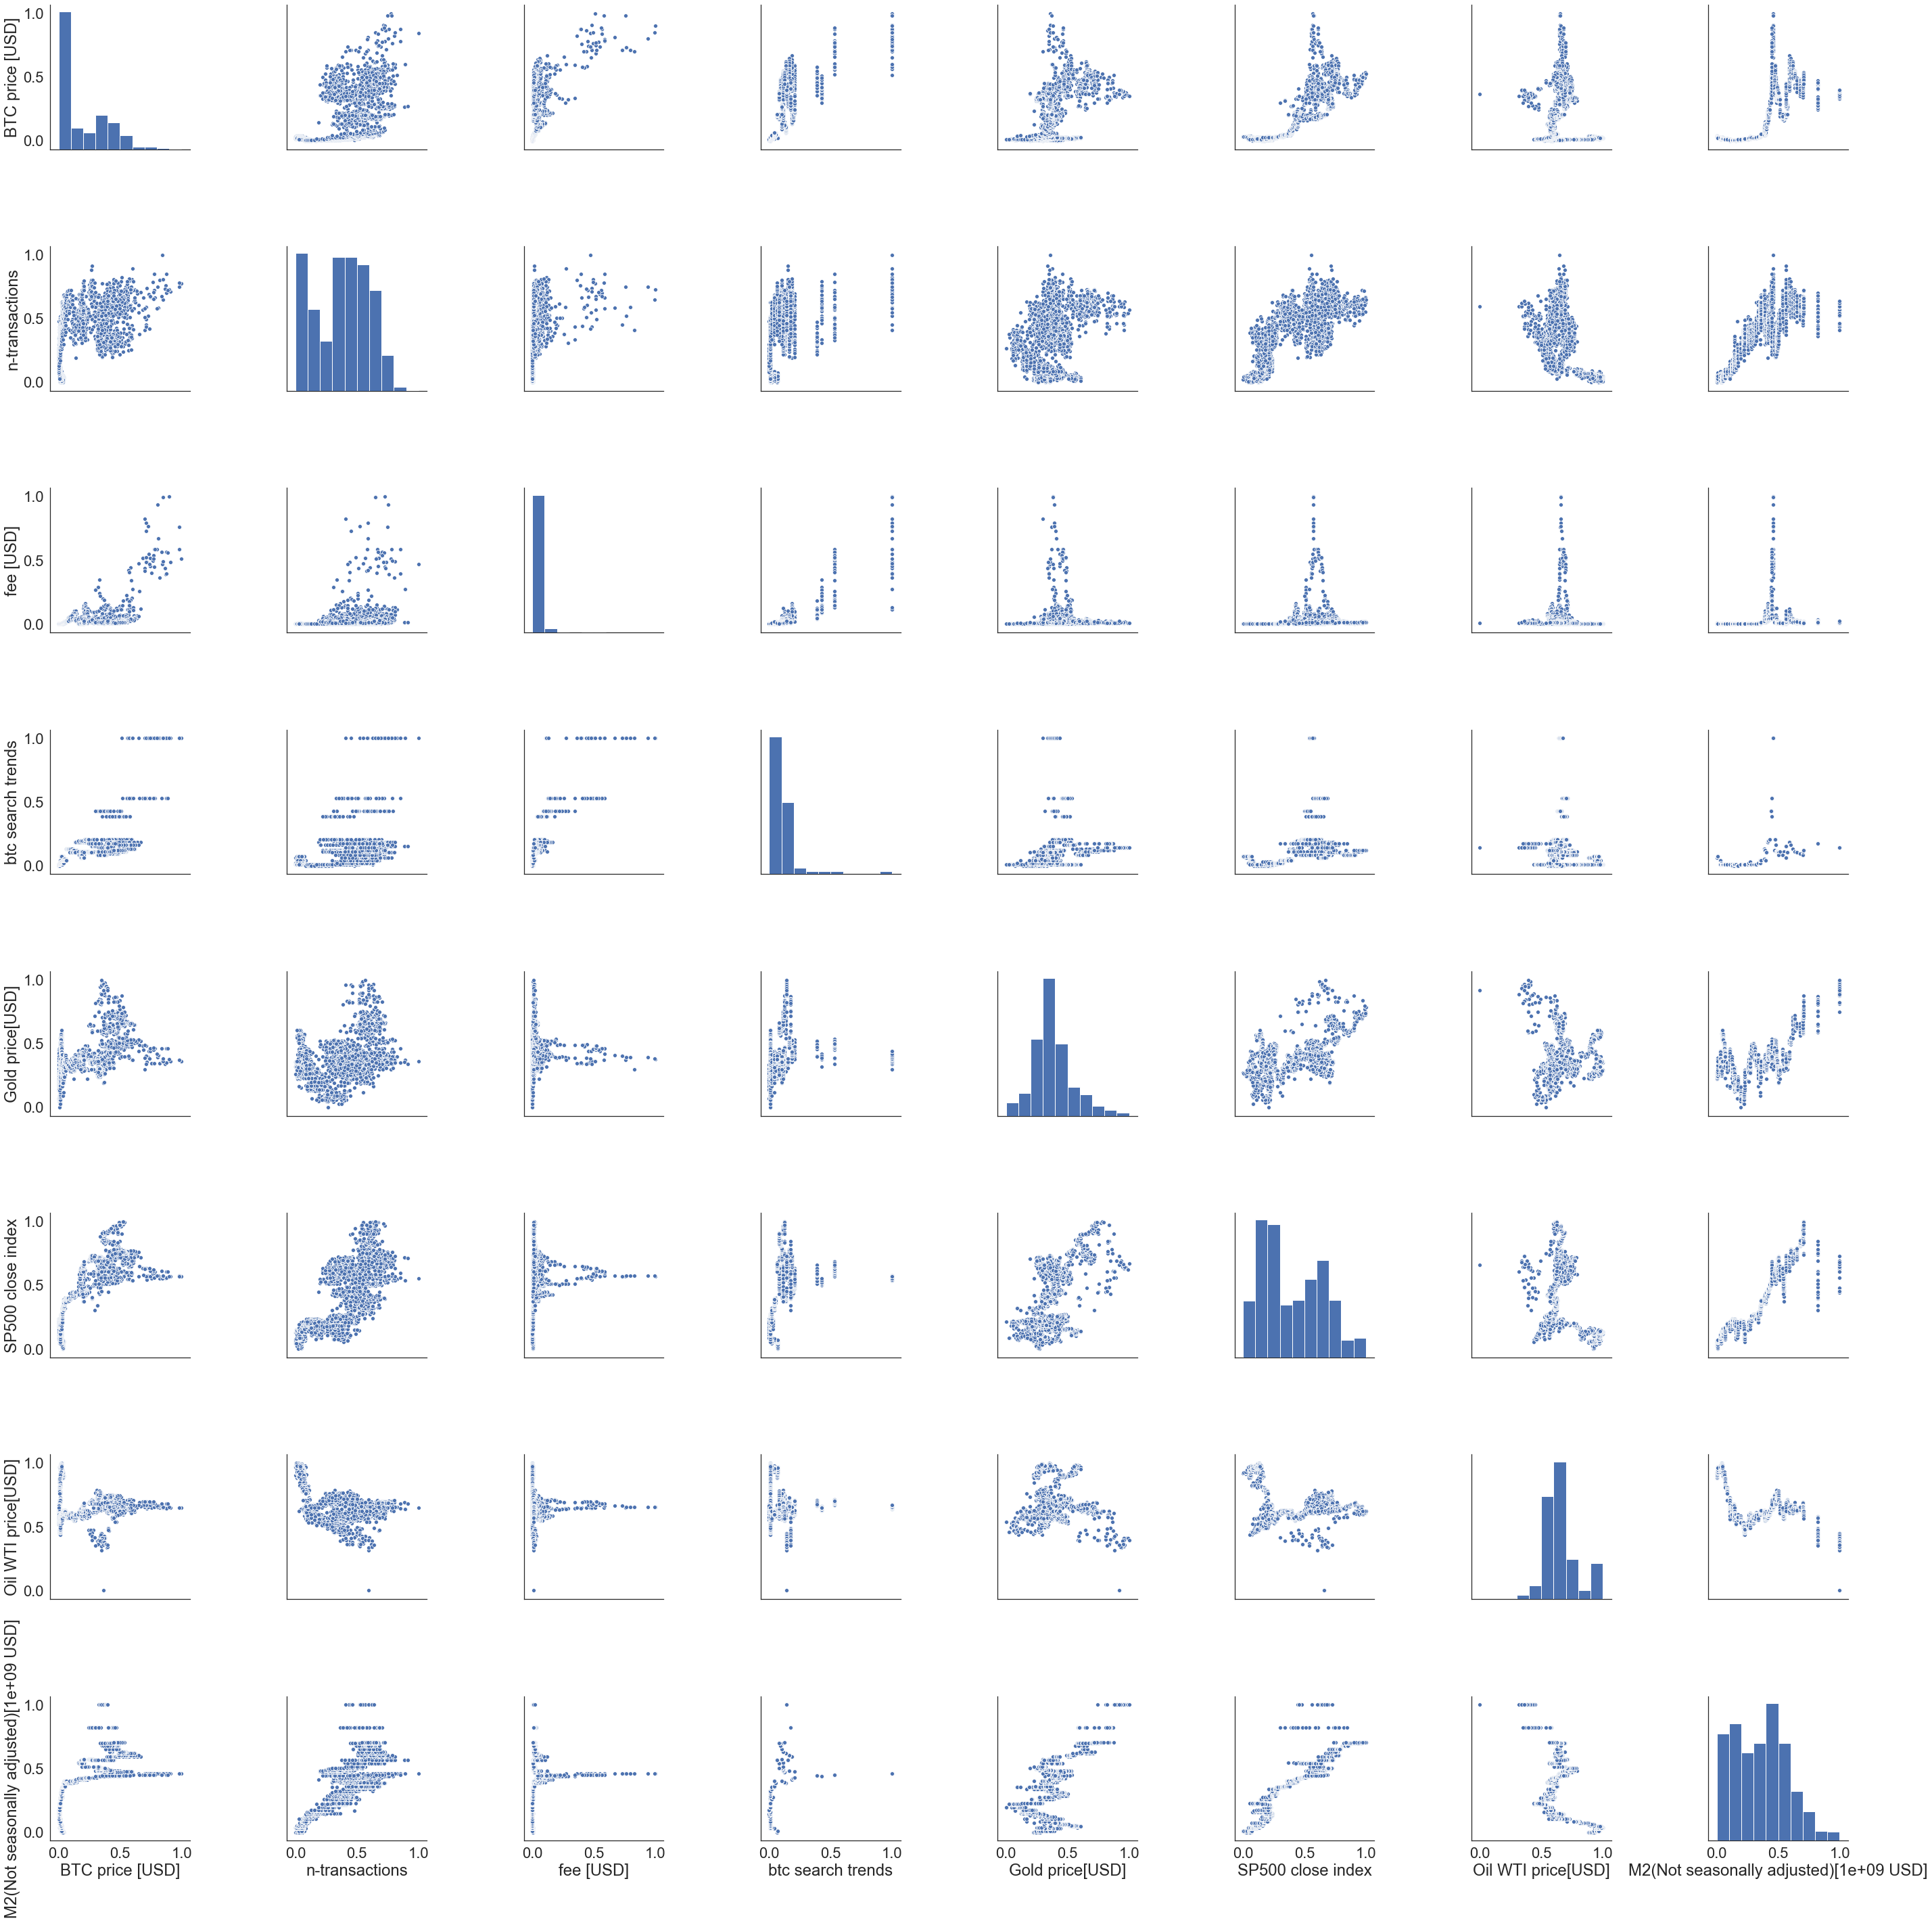

In [78]:
sns.set(font_scale=2)
sns.set(style='white',font_scale=2)
sns.pairplot(data2,height=5,aspect=1)
plt.show()

__4. Variance inflation factor (factor connected with multilinearity)__

In [107]:
def vif(dataset):
    X=data2.drop(columns=['BTC price [USD]'])    
    X=sm.add_constant(X)
    return pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns).iloc[1:]

In [112]:
ds=vif(data)
print(ds)
print("\n")
print('variables with large (>5) VIF:\n',ds[ds>5] )


n-transactions                             3.973424
fee [USD]                                  3.778416
btc search trends                          4.348378
Gold price[USD]                            2.068916
SP500 close index                          8.563969
Oil WTI price[USD]                         2.307268
M2(Not seasonally adjusted)[1e+09 USD]    14.679181
dtype: float64


variables with large (>5) VIF:
 SP500 close index                          8.563969
M2(Not seasonally adjusted)[1e+09 USD]    14.679181
dtype: float64


__5. Relationship between bitcoin price and the other features (with regression line)__

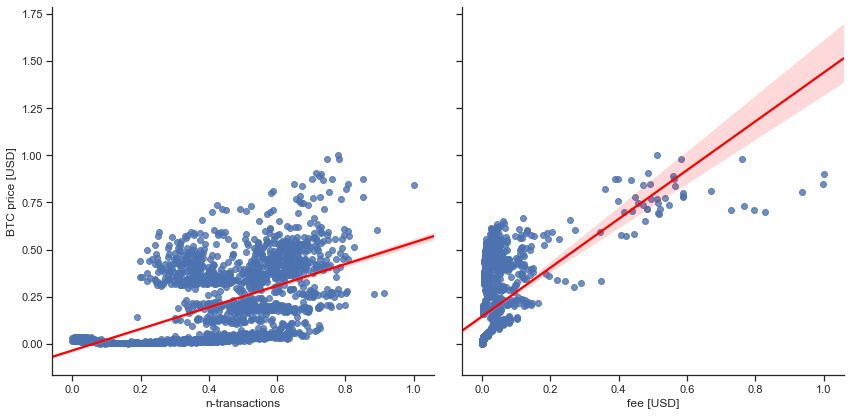

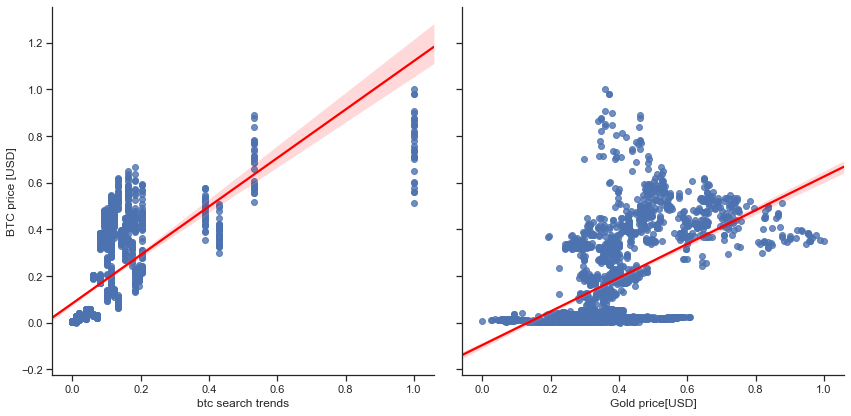

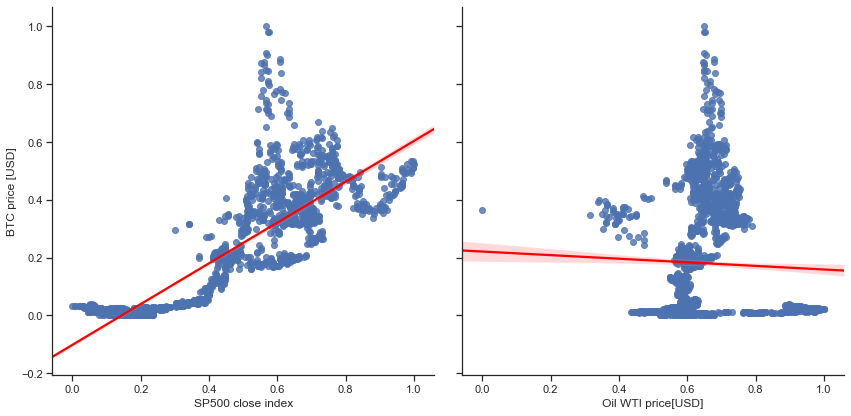

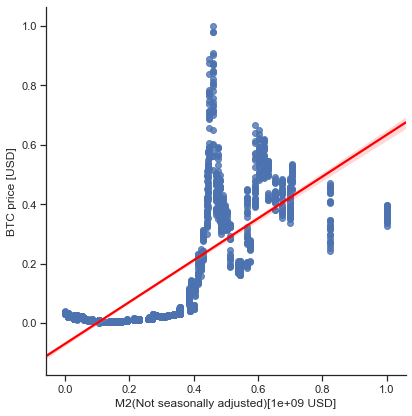

In [12]:
sns.set(style="ticks", color_codes=True)
col_in_rows=2
for i in range(1,len(data2.columns),col_in_rows):
    g = sns.PairGrid(data2,y_vars='BTC price [USD]',x_vars=data2.columns[i:i+col_in_rows],height=6)
    g.map(sns.regplot,order=1,line_kws={'color':'red'})

__7. Transformed data__ <br>
Some charts suggest that data transformation may lead to a more linear relationship. Below are shown some of the transformations.
1. The price of bitcoin and S&P500 index using the following transformation
$$ \sqrt[3]{BTC\_price} = SP500 $$

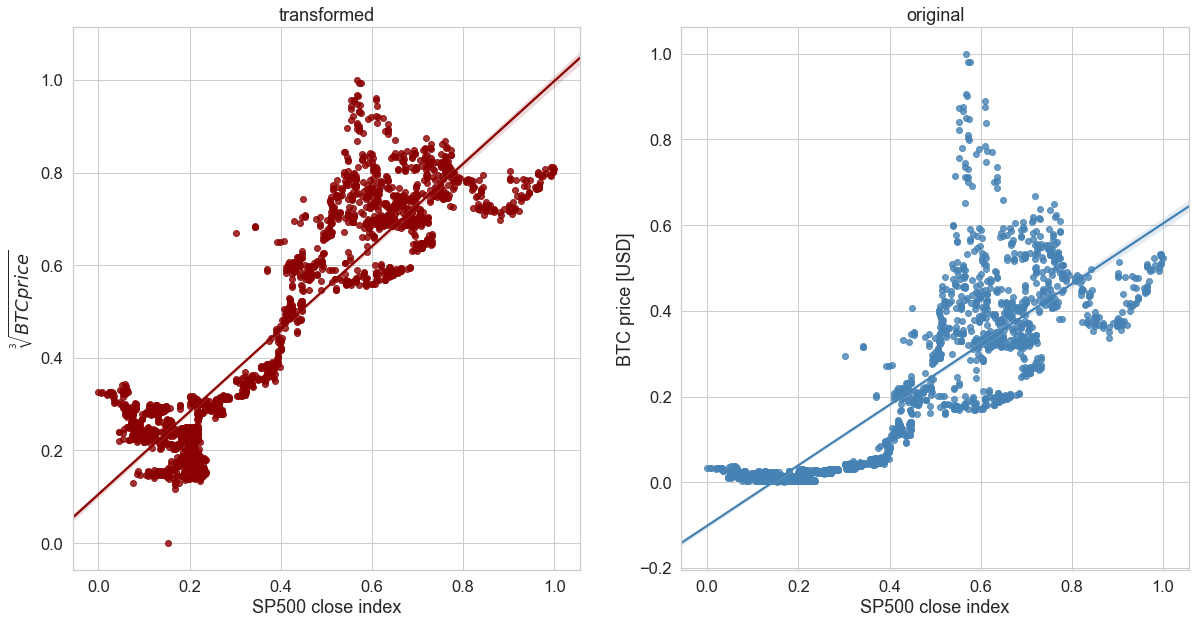

In [98]:
sns.set(style='whitegrid',font_scale=1.5)

fig,ax = plt.subplots(ncols=2,figsize=(20,10))
yt=data2['BTC price [USD]'].apply(lambda x: x**0.33)
xt=data2['SP500 close index']
y=data2['BTC price [USD]']
x=data2['SP500 close index']
sns.regplot(xt,yt,color='darkred',ax=ax[0])
sns.regplot(x,y,color='steelblue',ax=ax[1])

ax[0].set_ylabel('$ \sqrt[3]{BTC price}$')
ax[0].set_title('transformed')
ax[1].set_title('original')
plt.show()

2. The price of bitcoin and the fee using the following transformation
$$ {(BTC\_price)}^2 = Fee $$

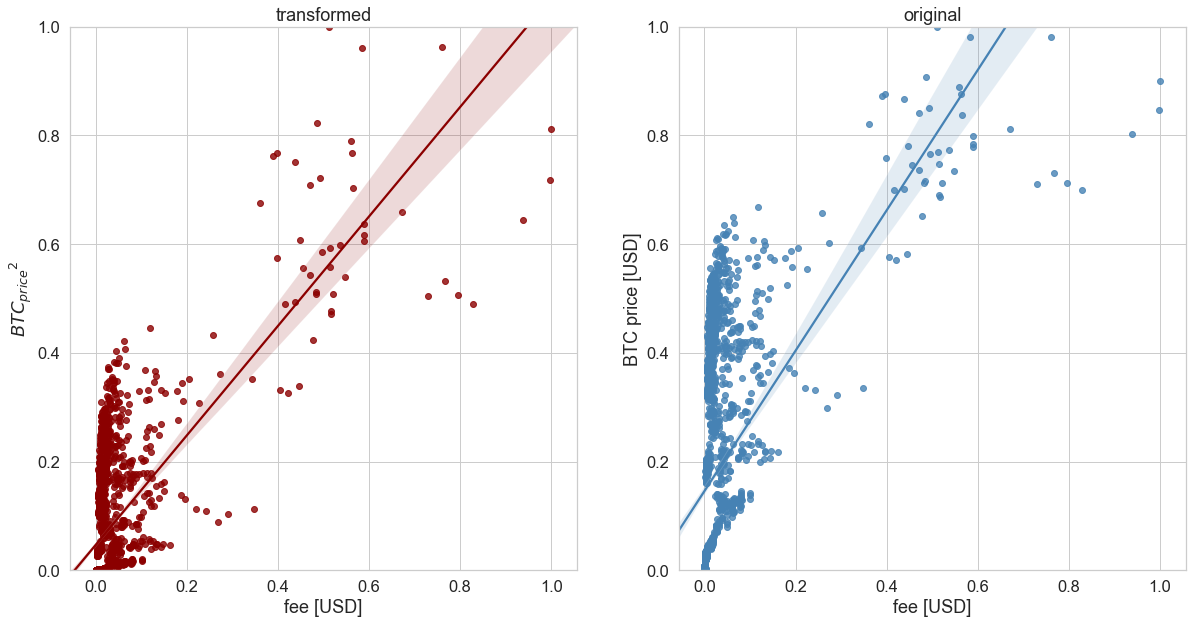

In [87]:
fig,ax = plt.subplots(ncols=2,figsize=(20,10))
yt=data2['BTC price [USD]'].apply(lambda x: x**2)
xt=data2['fee [USD]']
y=data2['BTC price [USD]']
x=data2['fee [USD]']
sns.regplot(xt,yt,color='darkred',ax=ax[0])
sns.regplot(x,y,color='steelblue',ax=ax[1])

ax[0].set_ylabel('$ {BTC_{price}}^2 $')
ax[0].set_title('transformed')
ax[0].set_ylim(0,1)
ax[1].set_title('original')
ax[1].set_ylim(0,1)
plt.show()


3. The price of bitcoin and the price of gold using the following transformation
$$ {(BTC\_price)}^2 = Gold\_price $$

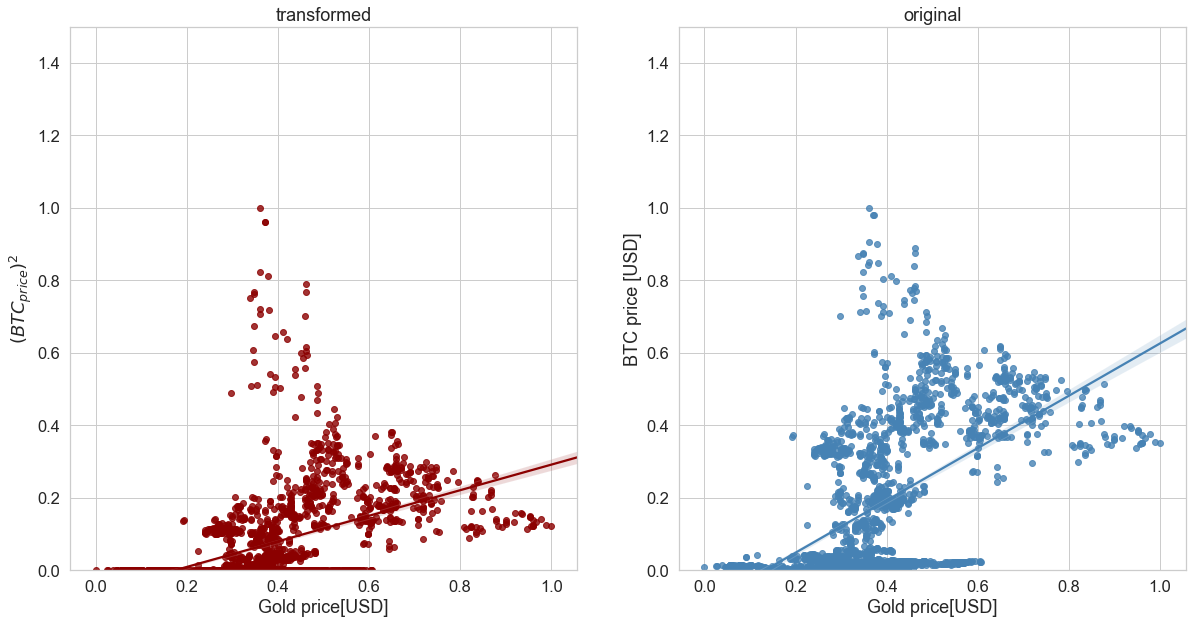

In [96]:
plt.show()
fig,ax = plt.subplots(ncols=2,figsize=(20,10))
yt=data2['BTC price [USD]'].apply(lambda x: x**2)
xt=data2['Gold price[USD]']
y=data2['BTC price [USD]']
x=data2['Gold price[USD]']
sns.regplot(xt,yt,color='darkred',ax=ax[0])
sns.regplot(x,y,color='steelblue',ax=ax[1])

ax[0].set_ylabel('$ {(BTC_{price})}^2 $')
ax[0].set_title('transformed')
ax[0].set_ylim(0,1.5)
ax[1].set_title('original')
ax[1].set_ylim(0,1.5)
plt.show()

__Conclusion:__
1. The charts  and correlation matrix suggest that the price of bitcoin is strongly connected with:
  - google search trends
  <br> It is understandable because the more popular bitcoin is the more people search for information about it
  - number of transactions <br> As with google search trends although there was a period where the price of bitcoin dropped and the number of transactions increased (from mid-2018 to mid-2019
  - M2 <br> This correlation is questionable, M2 money supply has been increasing for ages and most likely this trend will be kept, it results in an increase in the total value of money available in an economy so if it was strongly connected with the price of bitcoin high bitcoin price drops would not happen. __Note__ S&P500 is a good example - it is strongly connected with M2 money supply and market capitalization of S&P 500 component stocks is incomparable larger than cryptocurrencies market cap. For that reason the S&P500 drops lasted shorter and price drop was smaller
  - Fee <br> This correlation is questionable as well because it is more like technical issue. Although during the bull market in 2018 the fees were strongly connected with the price of bitcoin later this relationship diminished - the bitcoin network has been being improved
  - S&P 500 index <br> the explanation could be as follows: when bitcoin became a more popular asset it started to follow the trends of more capitalized markets
2. The other features that are connected with each other are as follows:
 - S&P500 index and M2 money supply
 - Fee and google search trends
 - Number of transactions and M2 money supply
 - Number of transactions and S&P500
 
3. The charts suggest that there are hardly any linear relationships between bitcoin price and other features. Therefore building a reliable linear regression model for predicting the price of bitcoin is infeasible (considering the features in the dataset created by the author)
4. The transformation of bitcoin price and S&P500 relationship yielded a more linear dependency
5. None of the feature has a normal distribution (see the diagonal of point 4 - graphical summary of the relationships in the dataset)